In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

from scipy import interpolate
import winsound as sd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import recall_score

from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Rescaling, Dropout, BatchNormalization
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [6]:
def csi(data):
    num = data[0][0]
    all_sum = np.sum(data)

    # 대각선 요소들의 합 계산
    diagonal_elements = np.diagonal(data)
    diagonal_sum = np.sum(diagonal_elements)
    
    result = (diagonal_sum-num)/(all_sum+num)

    return result

def beepsound():
    fr = 2000    # range : 37 ~ 32767
    du = 1000     # 1000 ms ==1second
    sd.Beep(fr, du) # winsound.Beep(frequency, duration)
beepsound()

In [ ]:
file_path = './data/rainfall_train_v1.csv'
rainfall = pd.read_csv(file_path)
rainfall = rainfall.drop(['vv', 'stn4contest'], axis=1)
rainfall

In [12]:
rainfall.columns

Index(['fc_month', 'fc_day', 'fc_hour', 'dh', 'ef_month', 'ef_day', 'ef_hour',
       'v01', 'v02', 'v03', 'v04', 'v05', 'v06', 'v07', 'v08', 'v09',
       'class_interval', 'quarter', 'timestamp', 'ef_day_y', 'fc_day_y',
       'rng_v01', 'rng_v02', 'rng_v03', 'rng_v04', 'rng_v05', 'rng_v06',
       'rng_v07', 'rng_v08', 'rng_v09', 'pred', 'pred_YN', 'roll_v07',
       'roll_v08', 'roll_v09', 'roll_rng_v01', 'roll_rng_v02', 'roll_rng_v03',
       'roll_rng_v04', 'roll_rng_v05', 'roll_rng_v06', 'roll_rng_v07',
       'roll_rng_v08', 'roll_rng_v09'],
      dtype='object')

## 추가전처리

In [18]:
rainfall.iloc[:3,3:21]

,dh,ef_month,ef_day,ef_hour,v01,v02,v03,v04,v05,v06,v07,v08,v09,class_interval,quarter,timestamp,ef_day_y,fc_day_y
0,21,5,2,6,42.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.619935e+09,122,121
1,24,5,2,9,67.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.619946e+09,122,121
2,27,5,2,12,23.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.619957e+09,122,121


In [49]:
rainfall['timestamp_log'] = np.log(rainfall['timestamp'])

In [50]:
rainfall2 = rainfall.drop(columns=['ef_day_y', 'timestamp'])

In [55]:
rainfall2

,fc_month,fc_day,fc_hour,dh,ef_month,ef_day,ef_hour,v01,v02,v03,...,roll_rng_v01,roll_rng_v02,roll_rng_v03,roll_rng_v04,roll_rng_v05,roll_rng_v06,roll_rng_v07,roll_rng_v08,roll_rng_v09,timestamp_log
0,5,1,9,21,5,2,6,42.0,5.0,0.0,...,10.50,1.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,21.205652
1,5,1,9,24,5,2,9,67.0,19.0,0.0,...,22.50,8.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,21.205659
2,5,1,9,27,5,2,12,23.0,10.0,2.0,...,25.75,10.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,21.205665
3,5,1,9,30,5,2,15,46.0,30.0,11.0,...,28.50,15.333333,4.333333,0.0,0.0,0.0,0.0,0.0,0.0,21.205672
4,5,1,9,33,5,2,18,48.0,28.0,5.0,...,24.25,16.666667,5.666667,0.5,0.0,0.0,0.0,0.0,0.0,21.205679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347993,9,30,21,228,10,10,9,9.0,7.0,2.0,...,1.00,3.666667,0.666667,2.0,0.0,0.0,0.0,0.0,0.0,21.252086
1347994,9,30,21,231,10,10,12,13.0,9.0,5.0,...,2.00,4.666667,0.666667,2.0,0.5,0.0,0.0,0.0,0.0,21.252092
1347995,9,30,21,234,10,10,15,13.0,9.0,5.0,...,3.00,4.333333,1.333333,2.0,1.0,0.0,0.0,0.0,0.0,21.252098
1347996,9,30,21,237,10,10,18,8.0,6.0,4.0,...,3.00,3.333333,2.000000,1.0,1.5,0.0,0.0,0.0,0.0,21.252105


In [64]:
target = 'class_interval'
x = rainfall2.drop(target, axis=1)
y = rainfall2.loc[:, target]

# train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.3, shuffle=False)

x_train = x.iloc[:944157]
y_train = y.iloc[:944157]
x_test = x.iloc[944157:]
y_test = y.iloc[944157:]

x_val = x_test.iloc[:282735]
y_val = y_test.iloc[:282735]

x_test = x_test.iloc[282735:]
y_test = y_test.iloc[282735:]

print(x_train.shape, x_val.shape, x_test.shape)

(944157, 42) (282735, 42) (121106, 42)


In [91]:
class_weights ={0.0: 1, 5.0: 34, 2.0: 40, 4.0: 43, 3.0: 46, 6.0: 51, 1.0: 63, 7.0: 68, 8.0: 177, 9.0: 207}
# class_weights = {0: 0.002, 5: 0.047, 2: 0.054, 4: 0.058, 3: 0.063, 6: 0.07, 1: 0.086, 7: 0.093, 8: 0.242, 9: 0.284}

In [143]:
### full_layer

# data load
clear_session()

# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

# base + hidden
model = Sequential([Dense(256, input_shape=(in_n, ), activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(32, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(16, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(out_n, activation='softmax')])

# 모델요약
model.summary()

# 설정
model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                   min_delta=0,               # 임계값
                   patience=5,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                   restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                   )

# 학습
history = model.fit(x_train, y_train, epochs = 200, callbacks=[es], validation_data=(x_val, y_val), class_weight=class_weights).history

# 성능 확인
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

print(confusion_matrix(y_test, pred_1))
print(classification_report(y_test, pred_1))

# beepsound()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,922 (222.35 KB)

 Trainable params: 55,930 (218.48 KB)

 Non-trainable params: 992 (3.88 KB)

Epoch 1/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.3677 - loss: 22.1804 - val_accuracy: 0.3377 - val_loss: 1.6286
Epoch 2/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - accuracy: 0.4067 - loss: 18.5602 - val_accuracy: 0.5187 - val_loss: 1.2492
Epoch 3/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.4009 - loss: 18.1561 - val_accuracy: 0.5287 - val_loss: 1.1549
Epoch 4/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 96s 3ms/step - accuracy: 0.3988 - loss: 18.0683 - val_accuracy: 0.3477 - val_loss: 1.3763
Epoch 5/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.3977 - loss: 17.9043 - val_accuracy: 0.4237 - val_loss: 1.2847
Epoch 6/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.3970 - loss: 17.7963 - val_accuracy: 0.4529 - val_loss: 1.2872
Epoch 7/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy: 0.3925 - loss: 17.7350 - val_accuracy: 0.4655 - val_loss: 1.2394
Epoch 8/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/st

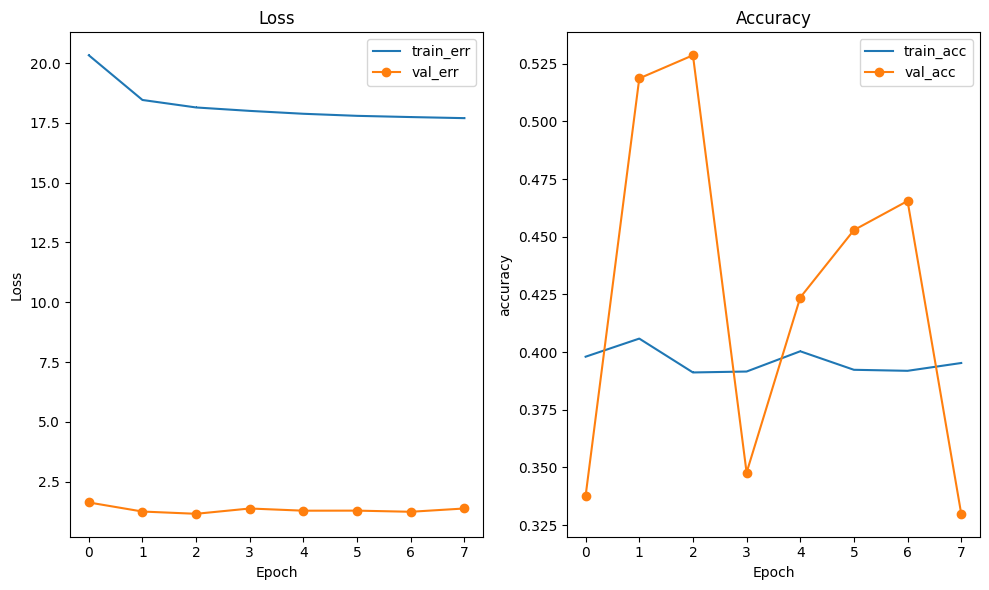

In [152]:
### 학습곡선 (loss)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history['loss'], label='train_err', marker = ',')
plt.plot(history['val_loss'], label='val_err', marker = 'o')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.title('Loss')

### 학습곡선 (Accuracy)
plt.subplot(1,2,2)
plt.plot(history['accuracy'], label='train_acc', marker = ',')
plt.plot(history['val_accuracy'], label='val_acc', marker = 'o')

plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

# GridsearchCV

In [127]:
# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

def modeling_test2(layer):
    # reset
    clear_session()

    # 첫번째 레이어는 input_shape가 필요.
    layer_list = [Dense(layer[0], input_shape=(in_n, ), activation='relu'),
                BatchNormalization(),
                Dropout(0.3)]

    # 주어진 레이어 수에 맞게 레이어 추가
    for lay in layer[1:] :  # 첫번째 레이어, 아웃풋 레이어는 명시적으로 추가하므로 2부터 시작
        layer_list.append(Dense(lay , activation = 'relu' ))
        layer_list.append(BatchNormalization())
        layer_list.append(Dropout(0.3))

    # Output Layer 추가하고 모델 선언
    layer_list.append(Dense(out_n, activation='softmax'))
    model = Sequential(layer_list)

    # 설정
    model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                    min_delta=0,               # 임계값
                    patience=3,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                    verbose=0,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                    restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                    )

    # 학습
    model.fit(x_train, y_train, epochs = 200, verbose=0, callbacks=[es], validation_data=(x_val, y_val), class_weight=class_weights)

    # 성능 확인
    pred = model.predict(x_test)
    pred_1 = pred.argmax(axis=1)
    
    a = confusion_matrix(y_test, pred_1)
    b = classification_report(y_test, pred_1)

    recall = recall_score(y_test, pred_1, average='macro')

    return recall, a, b

In [134]:
from itertools import combinations
lis = [2**i for i in range(4,10)]

for i in range(5,2,-1):
    print(i)
    ab = list(combinations(lis,i))
    result = None
    recall = 0

    for conv in ab: 
        conv2 = sorted(conv, reverse=True)
        temp, a, b = modeling_test2(conv2)
        
        if temp > recall :
            recall = temp
            result = conv2
            result_matrix = a
            result_report = b
            
print(f'best_recall : {recall} \nbest_parm : {result}')

5
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 997us/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
378

----

In [135]:
from sklearn.metrics import f1_score
# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

def modeling_test(layer):
    # reset
    clear_session()

    # 첫번째 레이어는 input_shape가 필요.
    layer_list = [Dense(layer[0], input_shape=(in_n, ), activation='relu'),
                BatchNormalization(),
                Dropout(0.3)]

    # 주어진 레이어 수에 맞게 레이어 추가
    for lay in layer[1:] :  # 첫번째 레이어, 아웃풋 레이어는 명시적으로 추가하므로 2부터 시작
        layer_list.append(Dense(lay, activation = 'relu' ))
        layer_list.append(BatchNormalization())
        layer_list.append(Dropout(0.3))

    # Output Layer 추가하고 모델 선언
    layer_list.append(Dense(out_n, activation='softmax'))
    model = Sequential(layer_list)

    # 설정
    model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                    min_delta=0,               # 임계값
                    patience=3,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                    verbose=0,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                    restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                    )

    # 학습
    model.fit(x_train, y_train, epochs = 200, verbose=0, callbacks=[es], validation_data=(x_val, y_val), class_weight=class_weights)

    # 성능 확인
    pred = model.predict(x_test)
    pred_1 = pred.argmax(axis=1)

    f1 = f1_score(y_test, pred_1, average='macro')
    recall = recall_score(y_test, pred_1, average='macro')

    return recall, f1

In [136]:
recall2 = 0
result2 = {}
for num in [2,3]:
    for i in range(0, len(result)):
        temp = result[:i] + [result[i]]*num + result[i+1:]
        temp2, temp3 = modeling_test(temp)
        result2[f'{i}_{num}'] = [temp2, temp3]
            
print(f'best_recall : {recall2} \nbest_parm : {result2}')

3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
best_recall : 0 
best_parm : {'0_2': [0.29592001189869716, 0.16119557433034565], '1_2': [0.3114512138073186, 0.19119356383849564], '2_2': [0.27693183030500035, 0.19442750742295112], '0_3': [0.29390124306551263, 0.18122368100041314], '1_3': [0.293558125318904, 0.15528698772261096], '2_3': [0.28166749930040347, 0.16857870284617732]}


In [139]:
result

[256, 128, 64]

In [138]:
result2

{'0_2': [0.29592001189869716, 0.16119557433034565],
 '1_2': [0.3114512138073186, 0.19119356383849564],
 '2_2': [0.27693183030500035, 0.19442750742295112],
 '0_3': [0.29390124306551263, 0.18122368100041314],
 '1_3': [0.293558125318904, 0.15528698772261096],
 '2_3': [0.28166749930040347, 0.16857870284617732]}

In [142]:
### best_model
### best_model.keras

# data load
clear_session()

# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

# base + hidden
model = Sequential([Dense(256, input_shape=(in_n, ), activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(out_n, activation='softmax')])

# 모델요약
model.summary()

# 설정
model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cb = ModelCheckpoint('./data/best_model.keras', save_best_only=True)
es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                   min_delta=0,               # 임계값
                   patience=5,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                   restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                   )

# 학습
history = model.fit(x_train, y_train, epochs = 200, callbacks=[es, cb], validation_data=(x_val, y_val), class_weight=class_weights).history

# 성능 확인
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

print(confusion_matrix(y_test, pred_1))
print(classification_report(y_test, pred_1))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,626 (279.79 KB)

 Trainable params: 70,474 (275.29 KB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.3738 - loss: 21.6720 - val_accuracy: 0.5468 - val_loss: 1.1474
Epoch 2/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.4206 - loss: 17.5255 - val_accuracy: 0.4446 - val_loss: 1.2351
Epoch 3/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 109s 4ms/step - accuracy: 0.4245 - loss: 17.1683 - val_accuracy: 0.4861 - val_loss: 1.2417
Epoch 4/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 198s 7ms/step - accuracy: 0.4283 - loss: 17.0185 - val_accuracy: 0.5101 - val_loss: 1.1536
Epoch 5/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.4329 - loss: 16.8482 - val_accuracy: 0.4618 - val_loss: 1.2436
Epoch 6/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 98s 3ms/step - accuracy: 0.4343 - loss: 16.7789 - val_accuracy: 0.3616 - val_loss: 1.3404
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
[[63974 20564  8215   335 11594   132   209   172     0    13]

# es없이 학습

In [177]:
# full_fit_model

# data load
clear_session()

# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

# base + hidden
model = Sequential([Dense(256, input_shape=(in_n, ), activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(out_n, activation='softmax')])

# 모델요약
model.summary()

# 설정
model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                   min_delta=0,               # 임계값
                   patience=20,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                   restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                   )

# 학습
history = model.fit(x_train, y_train, epochs = 200, callbacks=[es], verbose=0, validation_data=(x_val, y_val), class_weight=class_weights).history

model.save('./data/full_fit.keras')

# 성능 확인
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

print(confusion_matrix(y_test, pred_1))
print(classification_report(y_test, pred_1))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,626 (279.79 KB)

 Trainable params: 70,474 (275.29 KB)

 Non-trainable params: 1,152 (4.50 KB)

KeyboardInterrupt: 

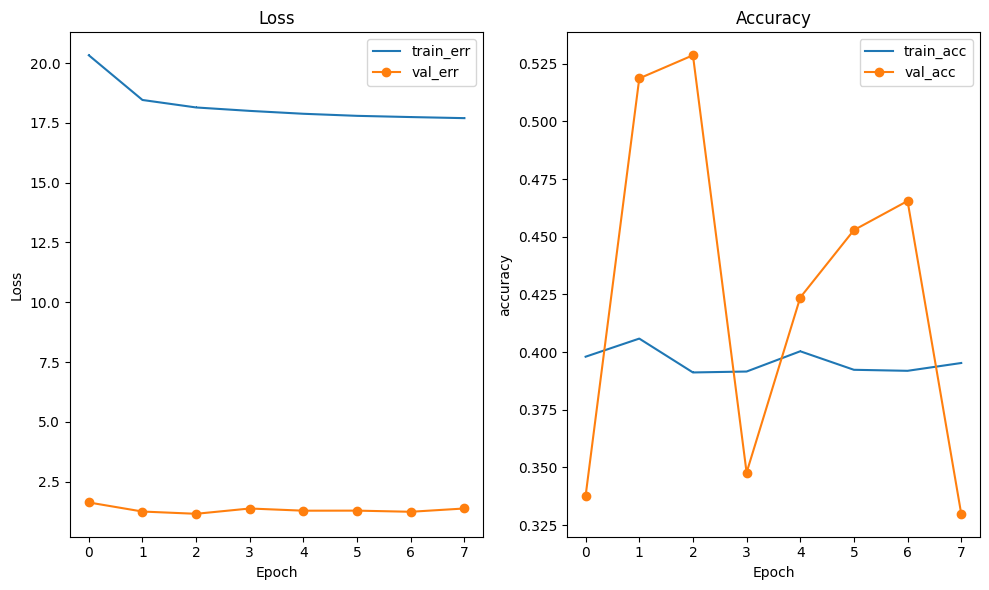

In [178]:
### 학습곡선 (loss)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history['loss'], label='train_err', marker = ',')
plt.plot(history['val_loss'], label='val_err', marker = 'o')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.title('Loss')

### 학습곡선 (Accuracy)
plt.subplot(1,2,2)
plt.plot(history['accuracy'], label='train_acc', marker = ',')
plt.plot(history['val_accuracy'], label='val_acc', marker = 'o')

plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

# VGG16

In [140]:
# VGG16

# data load
clear_session()

# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

# base + hidden
model = Sequential([Dense(256, input_shape=(in_n, ), activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(256, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(out_n, activation='softmax')])

# 모델요약
model.summary()

# 설정
model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                   min_delta=0,               # 임계값
                   patience=5,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                   restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                   )

# 학습
history = model.fit(x_train, y_train, epochs = 200, callbacks=[es], validation_data=(x_val, y_val), class_weight=class_weights).history

# 성능 확인
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

print(confusion_matrix(y_test, pred_1))
print(classification_report(y_test, pred_1))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,066 (551.04 KB)

 Trainable params: 140,170 (547.54 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.3622 - loss: 21.0829 - val_accuracy: 0.3499 - val_loss: 1.6116
Epoch 2/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 88s 3ms/step - accuracy: 0.4178 - loss: 17.4246 - val_accuracy: 0.4855 - val_loss: 1.1725
Epoch 3/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.4122 - loss: 17.0965 - val_accuracy: 0.4769 - val_loss: 1.2837
Epoch 4/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 87s 3ms/step - accuracy: 0.4247 - loss: 16.7898 - val_accuracy: 0.4233 - val_loss: 1.3679
Epoch 5/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 105s 4ms/step - accuracy: 0.4231 - loss: 16.8312 - val_accuracy: 0.3779 - val_loss: 1.3255
Epoch 6/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.4268 - loss: 16.5624 - val_accuracy: 0.4411 - val_loss: 1.2076
Epoch 7/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy: 0.4276 - loss: 16.6148 - val_accuracy: 0.4990 - val_loss: 1.2026
Epoch 7: early stopping
Restoring model weights from t

# prep데이터로 변경

In [8]:
file_path = './data/rainfall_train_prep.csv'
rainfall3 = pd.read_csv(file_path)
rainfall3 = rainfall3.drop(['vv'], axis=1)

rainfall3['timestamp_log'] = np.log(rainfall3['timestamp'])
rainfall3 = rainfall3.drop(columns=['ef_day_y', 'timestamp', 'fc_year', 'ef_year', 'stn4contest'])

rainfall3.shape

(1457432, 31)

In [9]:
target = 'class_interval'
x = rainfall3.drop(target, axis=1)
y = rainfall3.loc[:, target]

# train_input, test_input, train_target, test_target = train_test_split(x, y, test_size=0.3, shuffle=False)

x_train = x.iloc[:1020057]
y_train = y.iloc[:1020057]
x_test = x.iloc[1020057:]
y_test = y.iloc[1020057:]

# train_input, test_input, train_target, test_target = train_test_split(x_test, y_test, test_size=0.3, shuffle=False)

x_val = x_test.iloc[:1326092]
y_val = y_test.iloc[:1326092]

x_test = x_test.loc[1326092:]
y_test = y_test.loc[1326092:]

In [17]:
rainfall3['class_interval'].value_counts()
# rainfall3['class_interval'].value_counts(normalize=True)

class_interval
0.0    1224991
5.0      42513
2.0      36491
4.0      34014
3.0      31510
6.0      28307
1.0      23147
7.0      21281
8.0       8192
9.0       6986
Name: count, dtype: int64

In [19]:
# class_weights = {0: 0.002, 5: 0.047, 2: 0.054, 4: 0.058, 3: 0.063, 6: 0.07, 1: 0.086, 7: 0.093, 8: 0.242, 9: 0.284}
class_weights = {0: 0.12, 1: 6.3, 2: 3.99, 3: 4.63, 4: 4.28, 5: 3.43, 6: 5.15, 7: 6.85, 8: 17.79, 9: 20.86}

In [26]:
### best_model + shift파생변수X

# data load
clear_session()

# value
in_n = x_train.shape[1]
out_n = rainfall3[target].nunique()

# base + hidden
model = Sequential([Dense(256, input_shape=(in_n, ), activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(out_n, activation='softmax')])

# 모델요약
model.summary()

# 설정
model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                   min_delta=0,               # 임계값
                   patience=5,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                   restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                   )

# 학습
history = model.fit(x_train, y_train, epochs = 200, callbacks=[es], validation_data=(x_val, y_val), class_weight=class_weights).history

# 성능 확인
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

print(confusion_matrix(y_test, pred_1))
print(classification_report(y_test, pred_1))

# beepsound()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,554 (267.79 KB)

 Trainable params: 67,402 (263.29 KB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/200
14244/31877 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.3865 - loss: 2.3588

KeyboardInterrupt: 

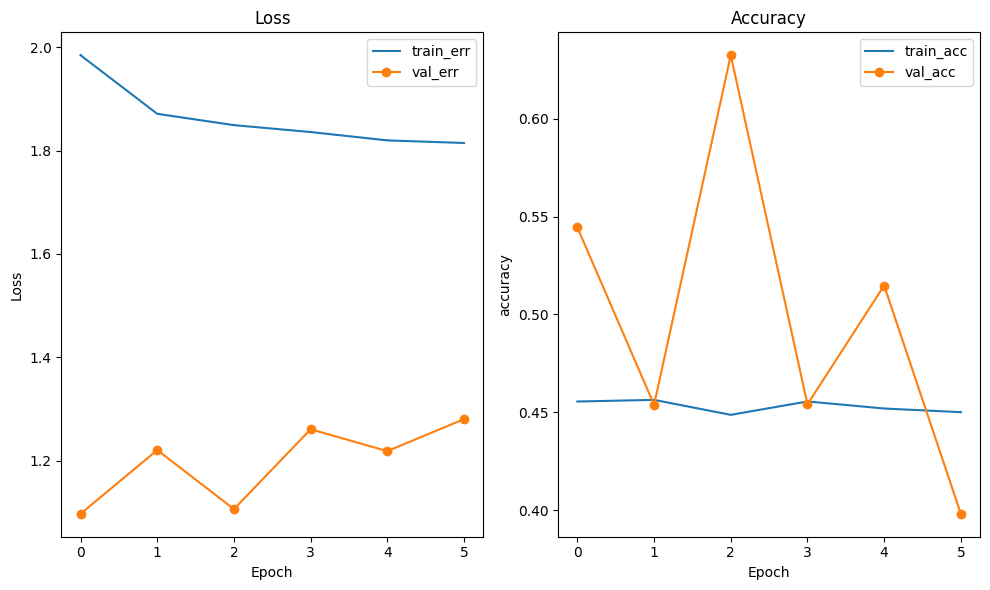

In [24]:
### 학습곡선 (loss)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history['loss'], label='train_err', marker = ',')
plt.plot(history['val_loss'], label='val_err', marker = 'o')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.title('Loss')

### 학습곡선 (Accuracy)
plt.subplot(1,2,2)
plt.plot(history['accuracy'], label='train_acc', marker = ',')
plt.plot(history['val_accuracy'], label='val_acc', marker = 'o')

plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

In [31]:
### full_fit

# data load
clear_session()

# value
in_n = x_train.shape[1]
out_n = rainfall3[target].nunique()

# base + hidden
model = Sequential([Dense(256, input_shape=(in_n, ), activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(out_n, activation='softmax')])

# 모델요약
model.summary()

# 설정
model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), class_weight=class_weights).history

# 성능 확인
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

cm = confusion_matrix(y_test, pred_1)
print(cm)
print(classification_report(y_test, pred_1))
print('csi_score : ', csi(cm))

beepsound()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,554 (267.79 KB)

 Trainable params: 67,402 (263.29 KB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/100
31877/31877 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - accuracy: 0.4448 - loss: 2.1629 - val_accuracy: 0.4104 - val_loss: 1.4608
Epoch 2/100
31877/31877 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.4923 - loss: 1.7616 - val_accuracy: 0.5244 - val_loss: 1.1381
Epoch 3/100
31877/31877 ━━━━━━━━━━━━━━━━━━━━ 86s 3ms/step - accuracy: 0.5010 - loss: 1.7296 - val_accuracy: 0.5794 - val_loss: 1.1194
Epoch 4/100
31877/31877 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.4973 - loss: 1.7068 - val_accuracy: 0.5522 - val_loss: 1.1205
Epoch 5/100
31877/31877 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.4967 - loss: 1.6957 - val_accuracy: 0.6715 - val_loss: 0.9743
Epoch 6/100
31877/31877 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.4983 - loss: 1.6842 - val_accuracy: 0.5472 - val_loss: 1.1060
Epoch 7/100
31877/31877 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.4929 - loss: 1.6772 - val_accuracy: 0.5406 - val_loss: 1.0724
Epoch 8/100
31877/31877 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - ac

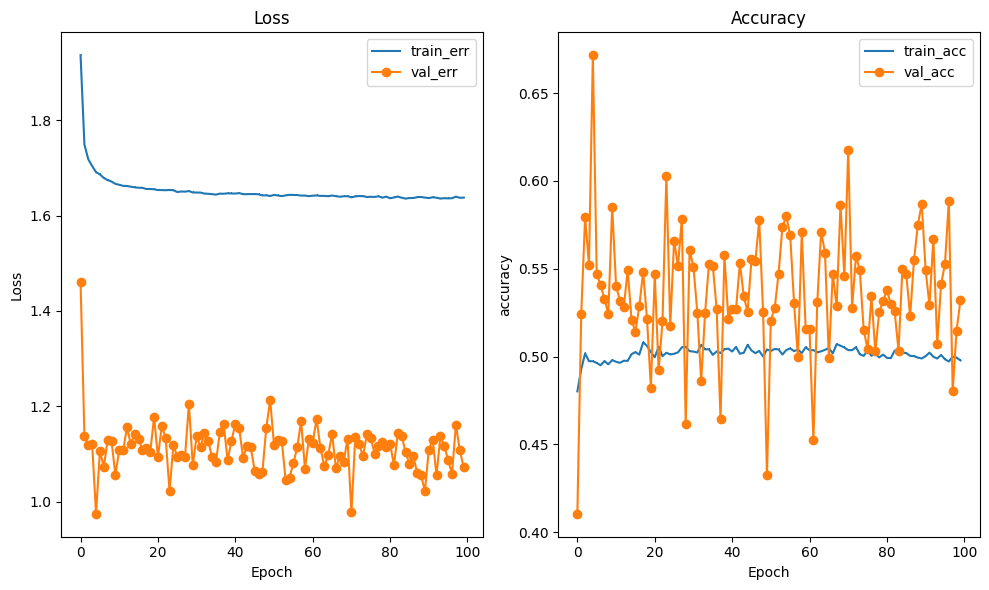

In [32]:
### 학습곡선 (loss)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history['loss'], label='train_err', marker = ',')
plt.plot(history['val_loss'], label='val_err', marker = 'o')

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.title('Loss')

### 학습곡선 (Accuracy)
plt.subplot(1,2,2)
plt.plot(history['accuracy'], label='train_acc', marker = ',')
plt.plot(history['val_accuracy'], label='val_acc', marker = 'o')

plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

## GridsearchCV

In [33]:
# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

def modeling_test2(layer):
    # reset
    clear_session()

    # 첫번째 레이어는 input_shape가 필요.
    layer_list = [Dense(layer[0], input_shape=(in_n, ), activation='relu'),
                BatchNormalization(),
                Dropout(0.3)]

    # 주어진 레이어 수에 맞게 레이어 추가
    for lay in layer[1:] :  # 첫번째 레이어, 아웃풋 레이어는 명시적으로 추가하므로 2부터 시작
        layer_list.append(Dense(lay , activation = 'relu' ))
        layer_list.append(BatchNormalization())
        layer_list.append(Dropout(0.3))

    # Output Layer 추가하고 모델 선언
    layer_list.append(Dense(out_n, activation='softmax'))
    model = Sequential(layer_list)

    # 설정
    model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                    min_delta=0,               # 임계값
                    patience=3,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                    verbose=0,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                    restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                    )

    # 학습
    model.fit(x_train, y_train, epochs = 200, verbose=0, callbacks=[es], validation_data=(x_val, y_val), class_weight=class_weights)

    # 성능 확인
    pred = model.predict(x_test)
    pred_1 = pred.argmax(axis=1)
    
    f1 = f1_score(y_test, pred_1, average='macro')
    recall = recall_score(y_test, pred_1, average='macro')

    return recall, f1

NameError: name 'rainfall2' is not defined

In [ ]:
from itertools import combinations
lis = [2**i for i in range(4,10)]
result = {}

for i in range(6,2,-1):
    print(i)
    ab = list(combinations(lis,i))
    result = None
    recall = 0

    for conv in ab: 
        conv2 = sorted(conv, reverse=True)
        temp, a = modeling_test2(conv2)
        
        result[conv2] = [temp, a]
            
print(f'best_recall : {recall} \nbest_parm : {result}')

5
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
4
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 997us/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
378

----

In [ ]:
# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

def modeling_test(layer):
    # reset
    clear_session()

    # 첫번째 레이어는 input_shape가 필요.
    layer_list = [Dense(layer[0], input_shape=(in_n, ), activation='relu'),
                BatchNormalization(),
                Dropout(0.3)]

    # 주어진 레이어 수에 맞게 레이어 추가
    for lay in layer[1:] :  # 첫번째 레이어, 아웃풋 레이어는 명시적으로 추가하므로 2부터 시작
        layer_list.append(Dense(lay, activation = 'relu' ))
        layer_list.append(BatchNormalization())
        layer_list.append(Dropout(0.3))

    # Output Layer 추가하고 모델 선언
    layer_list.append(Dense(out_n, activation='softmax'))
    model = Sequential(layer_list)

    # 설정
    model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                    min_delta=0,               # 임계값
                    patience=3,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                    verbose=0,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                    restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                    )

    # 학습
    model.fit(x_train, y_train, epochs = 200, verbose=0, callbacks=[es], validation_data=(x_val, y_val), class_weight=class_weights)

    # 성능 확인
    pred = model.predict(x_test)
    pred_1 = pred.argmax(axis=1)

    f1 = f1_score(y_test, pred_1, average='macro')
    recall = recall_score(y_test, pred_1, average='macro')

    return recall, f1

In [ ]:
recall2 = 0
result2 = {}
for num in [2,3]:
    for i in range(0, len(result)):
        temp = result[:i] + [result[i]]*num + result[i+1:]
        temp2, temp3 = modeling_test(temp)
        result2[f'{i}_{num}'] = [temp2, temp3]
            
print(f'best_recall : {recall2} \nbest_parm : {result2}')

3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
best_recall : 0 
best_parm : {'0_2': [0.29592001189869716, 0.16119557433034565], '1_2': [0.3114512138073186, 0.19119356383849564], '2_2': [0.27693183030500035, 0.19442750742295112], '0_3': [0.29390124306551263, 0.18122368100041314], '1_3': [0.293558125318904, 0.15528698772261096], '2_3': [0.28166749930040347, 0.16857870284617732]}


In [ ]:
result

[256, 128, 64]

In [ ]:
result2

{'0_2': [0.29592001189869716, 0.16119557433034565],
 '1_2': [0.3114512138073186, 0.19119356383849564],
 '2_2': [0.27693183030500035, 0.19442750742295112],
 '0_3': [0.29390124306551263, 0.18122368100041314],
 '1_3': [0.293558125318904, 0.15528698772261096],
 '2_3': [0.28166749930040347, 0.16857870284617732]}

In [ ]:
### best_model
### best_model.keras

# data load
clear_session()

# value
in_n = x_train.shape[1]
out_n = rainfall2[target].nunique()

# base + hidden
model = Sequential([Dense(256, input_shape=(in_n, ), activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(64, activation='relu'),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(out_n, activation='softmax')])

# 모델요약
model.summary()

# 설정
model.compile(optimizer=Adam(.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cb = ModelCheckpoint('./data/best_model.keras', save_best_only=True)
es = EarlyStopping(monitor='val_loss',        # 얼리스토핑을 적용할 관측 지표
                   min_delta=0,               # 임계값
                   patience=5,                # 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,                 # 몇 번째 epochs에서 얼리스토핑이 되었는가 알려줌
                   restore_best_weights=True  # 최적의 가중치를 가진 epoch 시점으로 가중치를 되돌림
                   )

# 학습
history = model.fit(x_train, y_train, epochs = 200, callbacks=[es, cb], validation_data=(x_val, y_val), class_weight=class_weights).history

# 성능 확인
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

print(confusion_matrix(y_test, pred_1))
print(classification_report(y_test, pred_1))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        11,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,626 (279.79 KB)

 Trainable params: 70,474 (275.29 KB)

 Non-trainable params: 1,152 (4.50 KB)

Epoch 1/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.3738 - loss: 21.6720 - val_accuracy: 0.5468 - val_loss: 1.1474
Epoch 2/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.4206 - loss: 17.5255 - val_accuracy: 0.4446 - val_loss: 1.2351
Epoch 3/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 109s 4ms/step - accuracy: 0.4245 - loss: 17.1683 - val_accuracy: 0.4861 - val_loss: 1.2417
Epoch 4/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 198s 7ms/step - accuracy: 0.4283 - loss: 17.0185 - val_accuracy: 0.5101 - val_loss: 1.1536
Epoch 5/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 93s 3ms/step - accuracy: 0.4329 - loss: 16.8482 - val_accuracy: 0.4618 - val_loss: 1.2436
Epoch 6/200
29505/29505 ━━━━━━━━━━━━━━━━━━━━ 98s 3ms/step - accuracy: 0.4343 - loss: 16.7789 - val_accuracy: 0.3616 - val_loss: 1.3404
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.
3785/3785 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
[[63974 20564  8215   335 11594   132   209   172     0    13]